# 로지스틱 회귀로 와인 분류하기

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [6]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [9]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


# 결정 트리

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


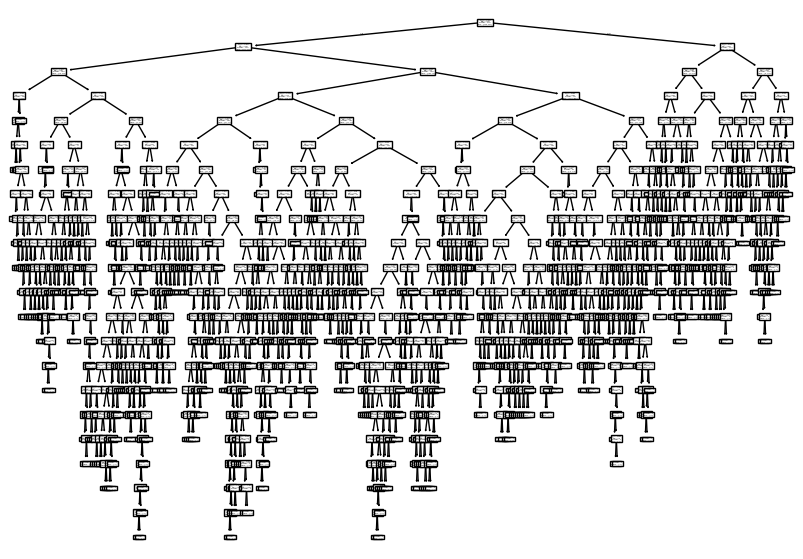

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

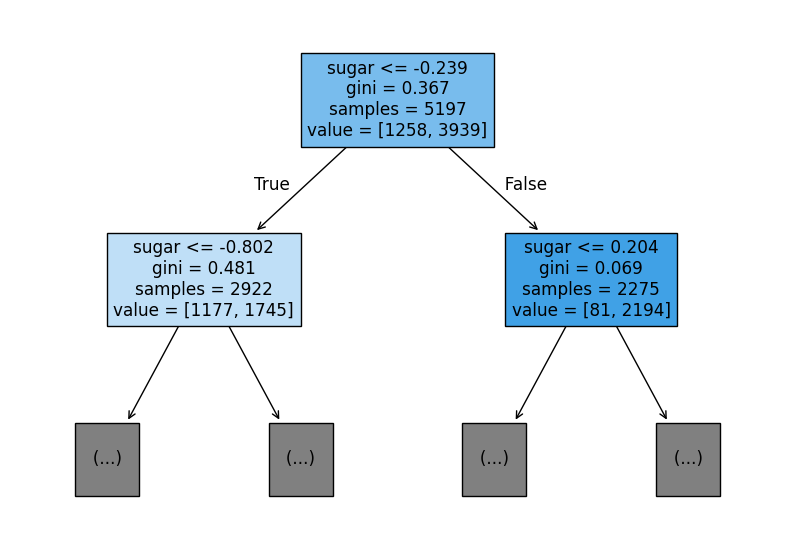

In [12]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 테스트 조건(sugar)
# 불순도(gini)
# 총 샘플 수(samples)
# 클래스별 샘플 수(value)

## 불순도

- DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini(지니 불순도)'
- criterion 매개변수: 노드에서 데이터를 분할할 기준을 정하는 것
- 트리를 분할할수록(아래 노드로 내려갈수록) 지니 불순도는 일반적으로 작아짐
- 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이(정보 이득)가 가능한 크도록 트리를 성장시킴
- 엔트로피 불순도도 있음

## 가지치기

In [13]:
# 트리의 최대 깊이를 지정함으로써 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


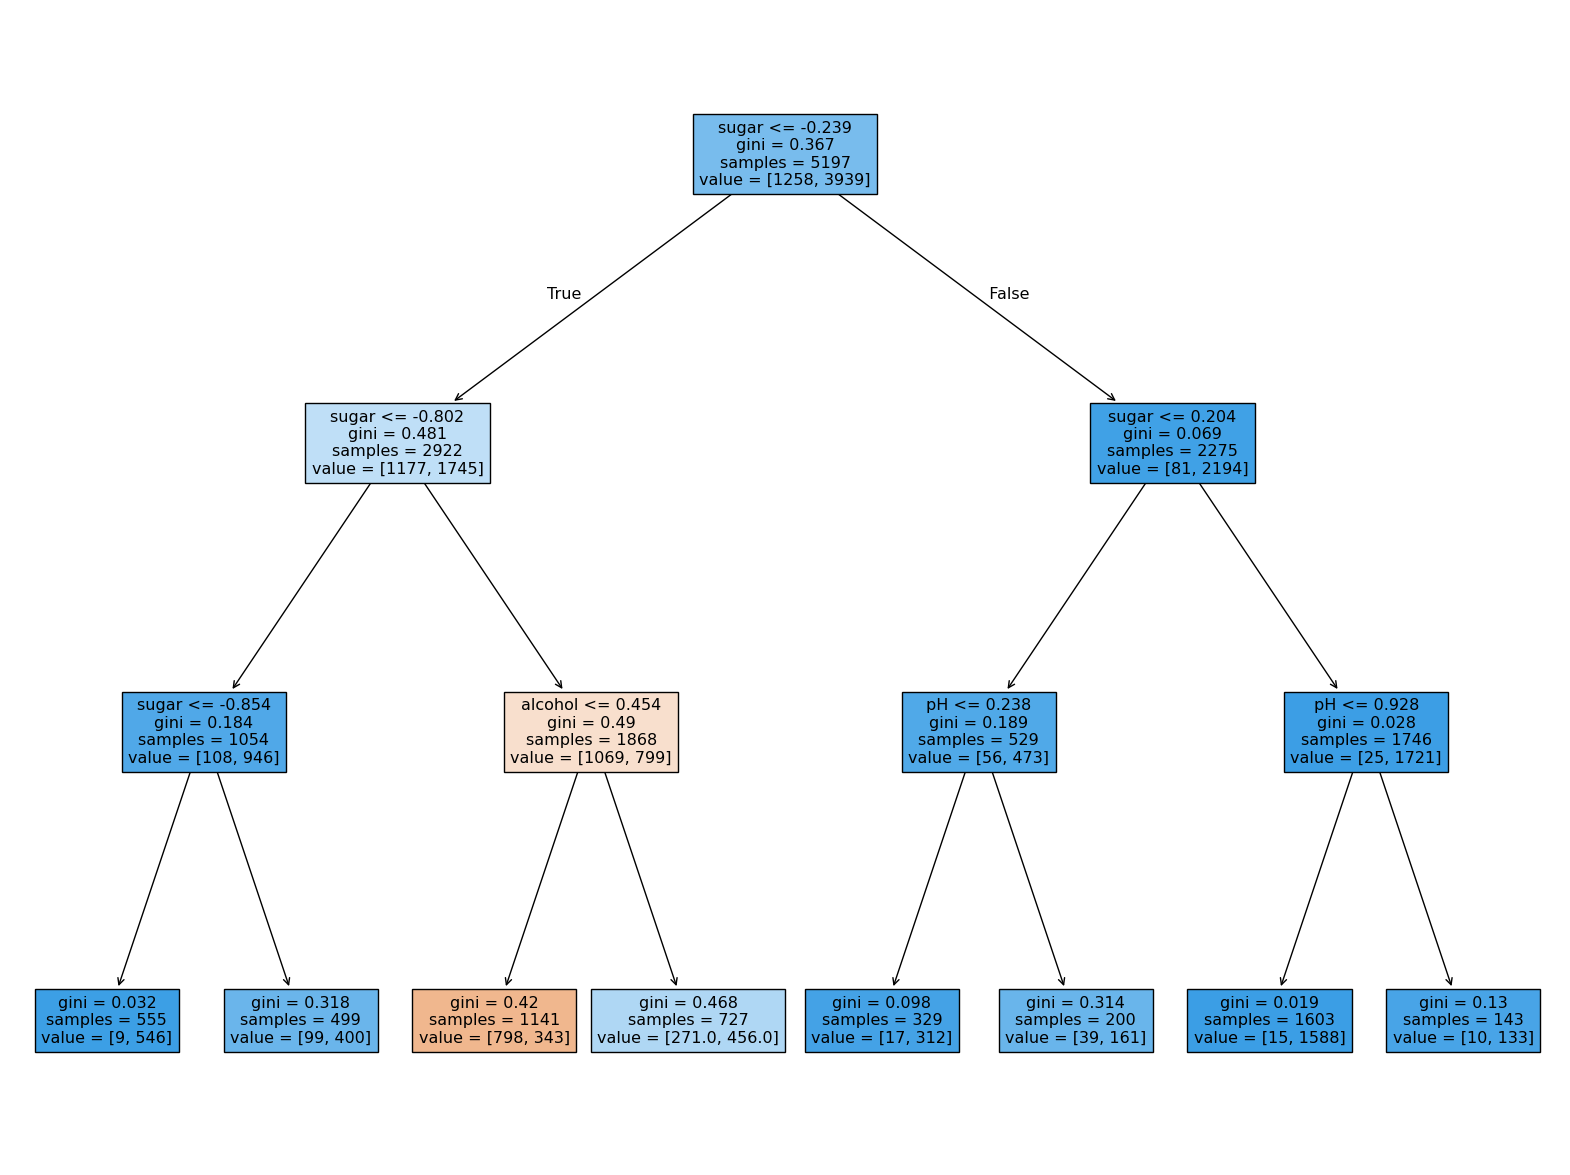

In [14]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [15]:
# 전처리하기 전의 훈련 세트와 테스트 세트로 결정 트리 모델 훈련
# 결정 트리는 표준화 전처리 과정이 필요 없음 -> 클래스 비율로 나누기 때문

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


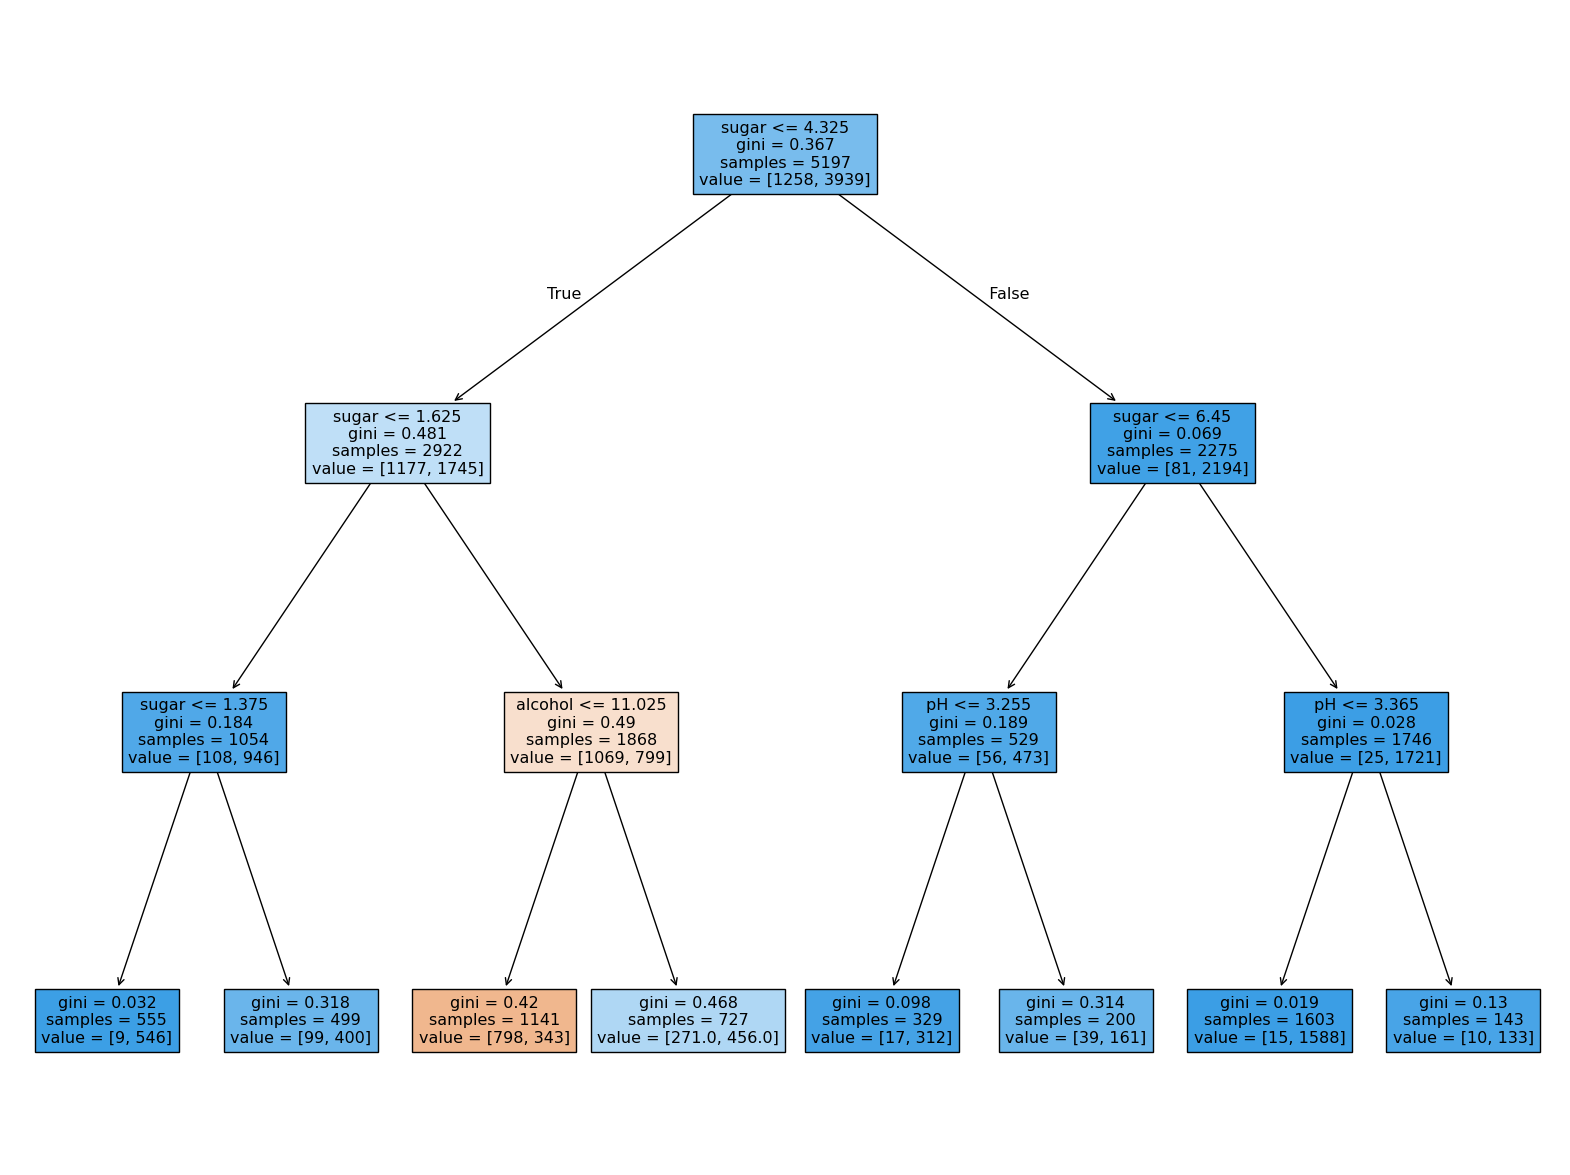

In [16]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [17]:
# 특성 중요도(어떤 특성이 가장 유용한지 나타내는 특성 중요도)
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


0.8568404848951318
0.8476923076923077


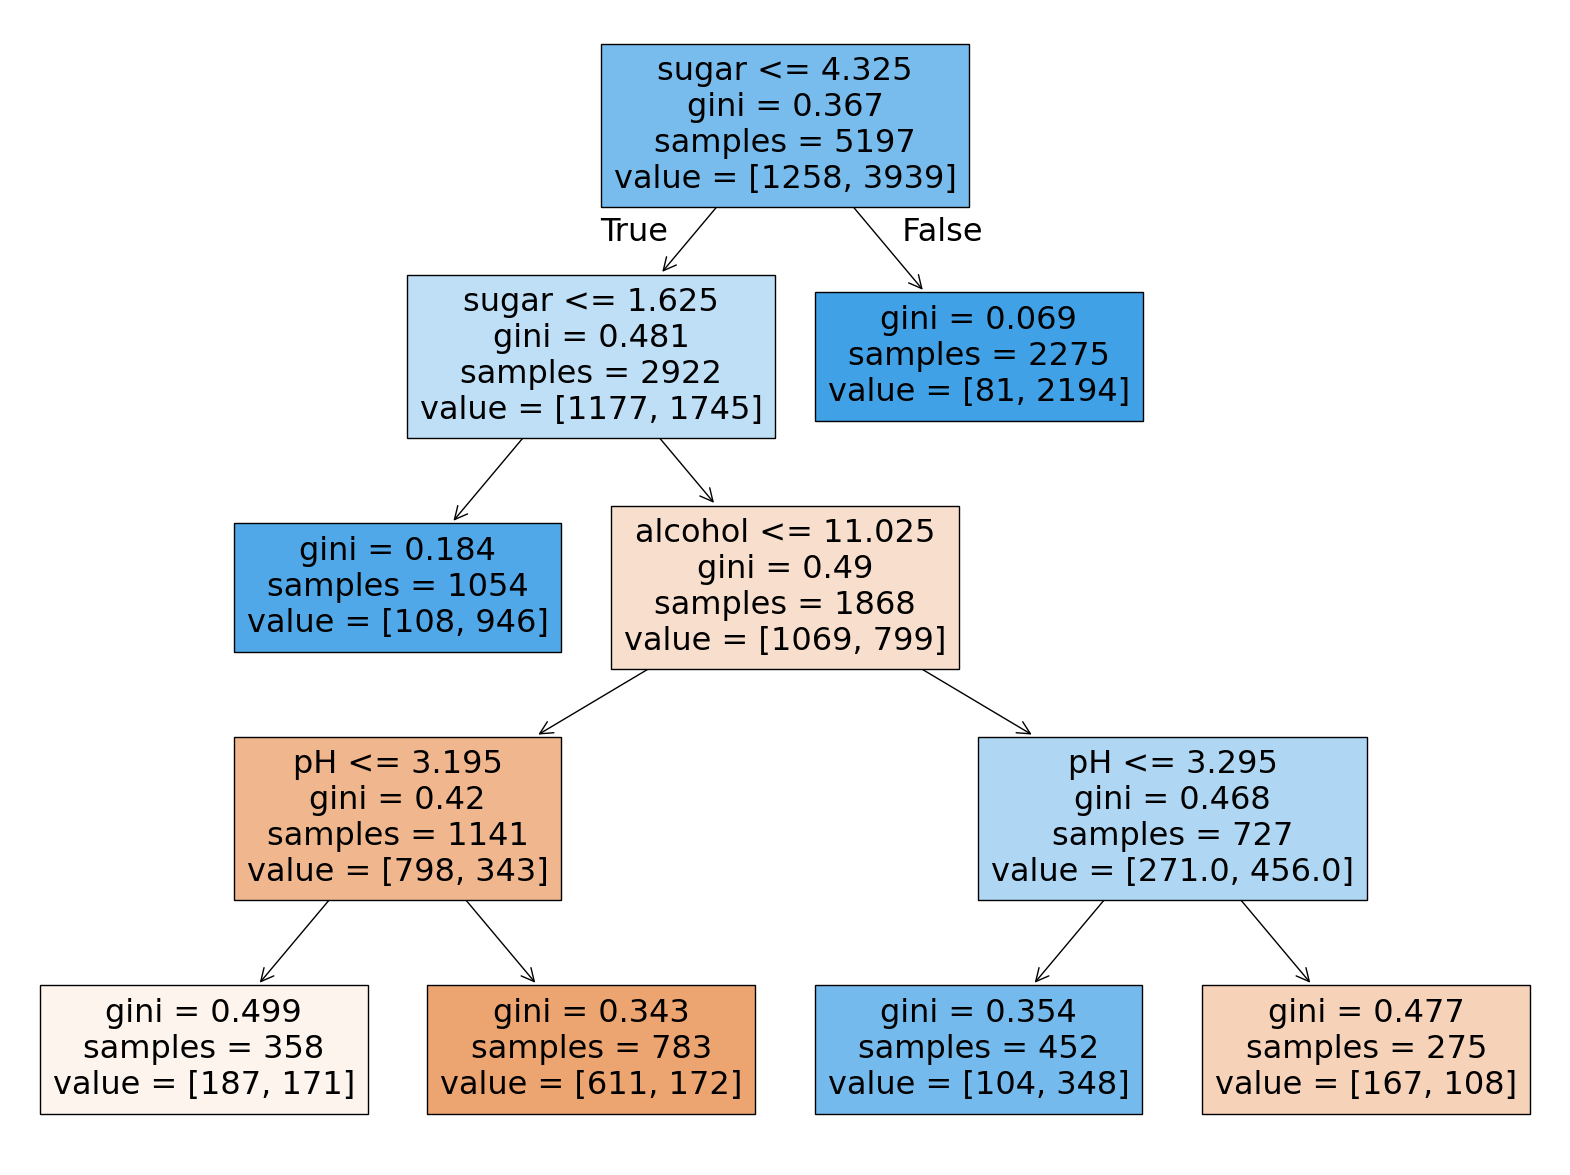

In [18]:
# max_depth 대신 min_impurity_decrease

dt = DecisionTreeClassifier(min_impurity_decrease=0.005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 교차 검증과 그리드 서치

## 검증 세트

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


## 교차 검증

In [20]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.02084398, 0.01570487, 0.01966214, 0.01610112, 0.01870108]), 'score_time': array([0.00330901, 0.00333738, 0.00314784, 0.00316429, 0.00331926]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [21]:
import numpy as np

print(np.mean(scores['test_score']))  # 교차 검증의 최종 점수

0.855300214703487


In [22]:
# cross_validate()은 데이터를 섞지 않음 -> 데이터 불균형 발생 -> 교차 검증 진행하기 전에 섞을 필요 O -> 분할기 지정
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [23]:
# 10폴드
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


## 하이퍼파라미터 튜닝

### 그리드 서치

In [24]:
from sklearn.model_selection import GridSearchCV

# 결정 트리 모델의 min_impurity_decrease 매개변수의 최적값 확인
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
# 사이킷런의 그리드 서치는 훈련이 끝나면 교차 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련
# best_estimator_ 속성에 저장됨
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [25]:
# 최적의 매개변수
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [26]:
# 각 매개변수에서 수행한 교차 검증의 평균 점수
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [27]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),  # 노드를 분할하기 위한 불순도 감소 최소량
          'max_depth': range(5, 20, 1),                               # 트리의 깊이 제한
          'min_samples_split': range(2, 100, 10)                      # 노드를 나누기 위한 최소 샘플 수
          }
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [28]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


### 랜덤 서치

In [29]:
from scipy.stats import randint

rgen = randint(0, 10)  # 0에서 10 사이의 범위를 갖는 객체 생성
rgen.rvs(10)           # 10개의 숫자를 샘플링

array([5, 5, 3, 5, 9, 5, 7, 4, 1, 5])

In [30]:
# 1000개 샘플링 -> 숫자들이 고르게 추출
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([106,  86,  92, 102, 118,  86, 109, 108,  96,  97]))

In [31]:
from scipy.stats import uniform

ugen = uniform(0, 1)
ugen.rvs(10)

array([0.38050948, 0.23010442, 0.60217326, 0.93687944, 0.16385512,
       0.1403961 , 0.21922027, 0.08514004, 0.50411487, 0.91937502])

In [32]:
params = {
    'min_impurity_decrease': uniform(0.0001, 0.001),
    'max_depth': randint(20, 50),
    'min_samples_split': randint(2, 25),
    'min_samples_leaf': randint(1, 25),  # 리프 노드가 되기 위한 최소 샘플의 개수. 어떤 노드가 분할하여 만들어질 자식 노드의 샘플 수가 이 값보다 작을 경우 분할 X
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    n_iter=100,  # 샘플링 횟수
    n_jobs=-1,
    random_state=42
)
rs.fit(train_input, train_target)
print(rs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [34]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8695428296438884


In [35]:
dt = rs.best_estimator_
print(dt.score(test_input, test_target))

0.86


# 트리의 앙상블

## 랜덤 포레스트

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [38]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [39]:
# 랜덤 포레스트는 훈련 세트에서 중복을 허용하여 샘플 생성
# 부트스트랩 샘플에 포함되지 않고 남는 샘플 존재
# OOB(Out of Bag) 샘플로 마치 검증 세트의 역할 진행
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 엑스트라 트리

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [41]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## 그레이디언트 부스팅

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [43]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)  # 결정 트리 개수를 100개에서 500개로 늘림
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [44]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


## 히스토그램 기반 그레이디언트 부스팅

In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [46]:
from sklearn.inspection import permutation_importance # 특성 중요도를 계산하기 위해서

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [47]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [48]:
hgb.score(test_input, test_target)

0.8723076923076923

In [49]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


In [50]:
from lightgbm import  LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
